## Análisis Temporal y geoespacial de temperaturas globales 

![earth](https://files.lafm.com.co/assets/public/styles/img_node_706x392/public/2023-11/planeta_tierra.jpg.webp?VersionId=FLdV.KnfiQTA1_MCAnTd4ywUj7..po1H&itok=aQys0k7t)

El análisis esta en desarrollo 

### Exploración y predicción de tendencias climáticas

El cambio climático y la variabilidad climática son fenómenos de creciente interés y preocupación en la actualidad. Este estudio se centra en el análisis de datos de temperaturas registradas en diversas partes del mundo a lo largo del tiempo. Utilizando un conjunto de datos globales de temperaturas, se realiza una exploración detallada para identificar patrones temporales y geográficos, comprender tendencias a largo plazo, y predecir comportamientos futuros.

#### Fuente del Dataset

El dataset utilizado en este análisis fue obtenido de la plataforma Kaggle, una de las comunidades más grandes y populares para científicos de datos y entusiastas del machine learning. Kaggle ofrece una amplia variedad de datasets públicos, así como competencias y recursos para el aprendizaje y desarrollo en el campo de la ciencia de datos.

La elección de este dataset se debe a su amplia cobertura geográfica y temporal, lo que permite un análisis exhaustivo y detallado de las tendencias y patrones de temperatura a nivel global. El acceso a estos datos a través de Kaggle facilita su uso para investigaciones y proyectos académicos.

#### Entendiendo el Dataset

In [111]:
# Importar librerias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib.ticker import MultipleLocator
import plotly.express as px
from geopy.geocoders import Nominatim
import folium
from geopy.exc import GeocoderTimedOut
from IPython.display import display
import folium
import plotly.express as px
from IPython.display import Image, display

In [112]:
# Importar el csv
df = pd.read_csv('C:/Users/franc/Documents/Proyectos/DataSets/city_temperature.csv')
df 

C:\Users\franc\AppData\Local\Temp\ipykernel_15356\123880986.py:2: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [113]:
# Información básica de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [114]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


Al realizar el análisis preliminar del dataset utilizando la función describe(), se identificaron algunas irregularidades en los datos. En primer lugar, se observó que hay valores en los años analizados que se encuentran fuera del rango esperado, lo cual sugiere la presencia de errores o datos anómalos. Además, se detectó la presencia de días con el número cero, un valor que claramente no tiene sentido en el contexto de un calendario de fechas, lo que podría indicar problemas en la entrada de datos o en el procesamiento previo.

Por otro lado, el análisis de las temperaturas reveló que, aunque no se observaron valores fuera del rango esperado, es esencial validar estos datos en función de su contexto geográfico y temporal para asegurar la precisión de los resultados. Estas irregularidades en los datos de fechas requieren una revisión adicional para corregir o eliminar los valores problemáticos, mientras que las temperaturas deberán ser verificadas para confirmar que están correctamente alineadas con los parámetros esperados. Recordemos que la temperatura esta en grados Fahrenheit. 

#### Limpieza de Datos

In [115]:
# Verificar valores nulos
valores_nulos = df.isnull().sum()

# Mostrar las columnas con valores nulos
print(valores_nulos[valores_nulos > 0])

State    1450990
dtype: int64


En este caso, solo la columna 'State' contiene valores nulos, es importante considerar esto para futuros análisis, pero por el momento continuaremos con estos valores nulos, ya que la información del estado o provincia en cuestión, no es relevante por el momento.

In [116]:
# Verificar filas duplicadas
duplicados = df[df.duplicated()]

# Contar el número de filas duplicadas
num_duplicados = len(duplicados)

print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 20715


In [117]:
# Mostrar las filas duplicadas 
print(duplicados)

                Region  Country     State           City  Month  Day  Year  \
742977          Europe  Germany       NaN        Hamburg     12    9  2007   
742983          Europe  Germany       NaN        Hamburg     12   15  2007   
742984          Europe  Germany       NaN        Hamburg     12   16  2007   
742990          Europe  Germany       NaN        Hamburg     12   22  2007   
742991          Europe  Germany       NaN        Hamburg     12   23  2007   
...                ...      ...       ...            ...    ...  ...   ...   
1705580  North America       US  Maryland  Washington DC      5    9  2020   
1705581  North America       US  Maryland  Washington DC      5   10  2020   
1705582  North America       US  Maryland  Washington DC      5   11  2020   
1705583  North America       US  Maryland  Washington DC      5   12  2020   
1705584  North America       US  Maryland  Washington DC      5   13  2020   

         AvgTemperature  
742977            -99.0  
742983     

In [118]:
# Eliminar filas duplicadas
df_temp = df.drop_duplicates()
df_temp

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [119]:
filtro = (df_temp['Day'] >= 1) & (df_temp['Year'] >= 1995) 
df_t = df_temp[filtro]
df_t

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [120]:
df_t.describe()

,Month,Day,Year,AvgTemperature
count,2.885309e+06,2.885309e+06,2.885309e+06,2.885309e+06
mean,6.468491e+00,1.571674e+01,2.006891e+03,5.603188e+01
std,3.456184e+00,8.800511e+00,7.277683e+00,3.211452e+01
min,1.000000e+00,1.000000e+00,1.995000e+03,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.560000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


Como resultado de este proceso de limpieza, el dataset ya no presenta valores fuera del rango esperado.

#### Análisis Exploratorio de Datos

In [121]:
# Calcula la temperatura media por año. 
avg_temp = df_t.groupby('Year')
avg = avg_temp['AvgTemperature'].mean()
avg

Year
1995    50.746514
1996    50.396406
1997    51.493363
1998    50.106151
1999    52.349490
2000    52.361792
2001    54.861366
2002    52.572576
2003    53.504479
2004    54.645620
2005    56.292897
2006    56.321096
2007    57.653613
2008    56.890229
2009    58.345122
2010    58.029693
2011    59.088301
2012    60.217053
2013    58.945102
2014    58.489765
2015    60.644824
2016    60.788483
2017    60.955490
2018    59.833538
2019    59.234512
2020    53.807638
Name: AvgTemperature, dtype: float64

In [122]:
# Convertir esta tabla en arrays
years = np.array(avg.index)
avg_temperatures = np.array(avg.values)

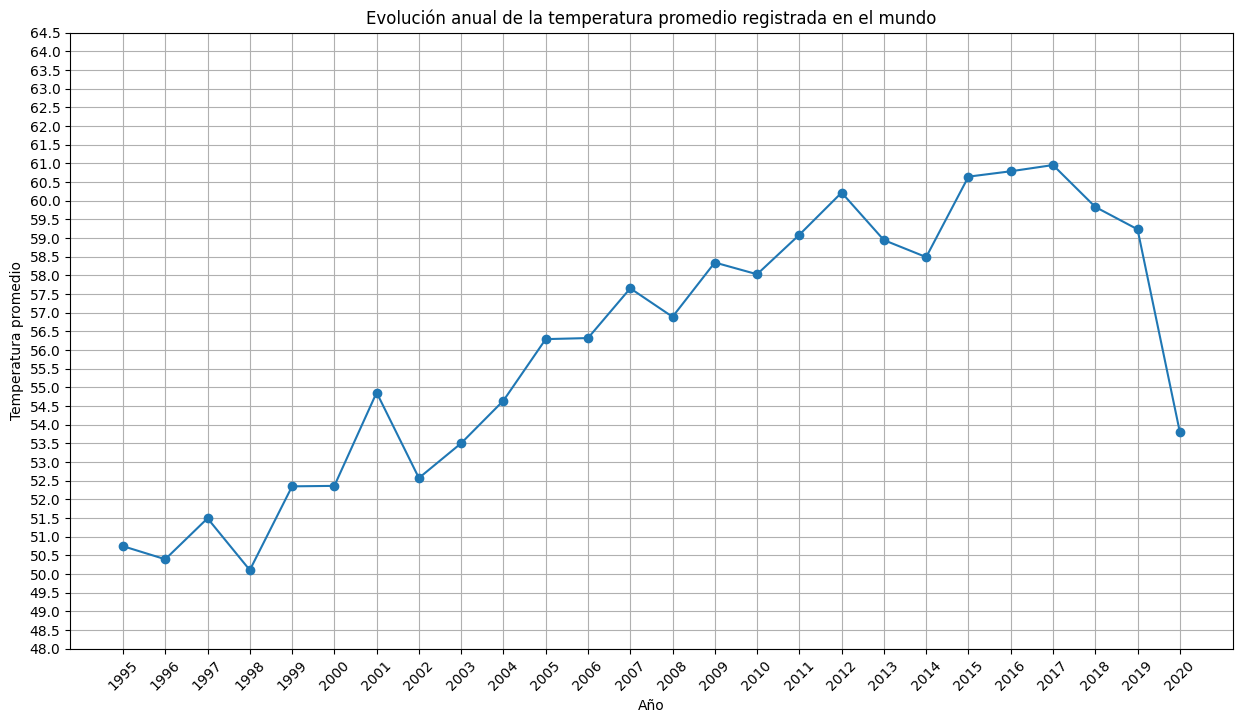

In [123]:
# Crear un gráfico de líneas 
plt.figure(figsize=(15, 8))
plt.plot(years, avg_temperatures, marker='o')
plt.title('Evolución anual de la temperatura promedio registrada en el mundo')
plt.xlabel('Año')
plt.ylabel('Temperatura promedio')
plt.xticks(np.arange(1995, 2021, 1), rotation=45)
plt.yticks(np.arange(48, 65, 0.5))
plt.grid(True)
plt.show()

Al analizar la evolución de la temperatura media a lo largo de los años, se observa un comportamiento inusual en el año 2020. Hasta ese momento, la temperatura media había mostrado una tendencia al alza, reflejando un crecimiento constante en los valores registrados. Sin embargo, en 2020, se produce una caída abrupta de la temperatura media, lo que rompe con la tendencia observada en años anteriores.

Este cambio drástico en la temperatura media de 2020 ha generado la sospecha de que podría estar relacionado con la cantidad de mediciones realizadas durante ese año. Es posible que la cobertura de datos en 2020 haya sido significativamente menor que en los años anteriores, lo que podría haber afectado la precisión del cálculo de la temperatura media. La menor cantidad de mediciones podría haber sesgado los resultados, especialmente si las mediciones disponibles no son representativas de las condiciones generales.

In [124]:
# Cantidad de datos por año
df_count = df_t.groupby('Year').size()
df_count

Year
1995    117886
1996    118218
1997    117926
1998    118352
1999    118625
2000    118950
2001    118625
2002    118625
2003    118410
2004    117913
2005    117165
2006    116917
2007    114685
2008    113827
2009    113517
2010    114533
2011    112313
2012    111258
2013    110291
2014    108288
2015    106768
2016    106504
2017    106216
2018    105660
2019    105295
2020     38542
dtype: int64

In [125]:
# Crear un array con la cantidad de datos por año
count = np.array(df_count.values)

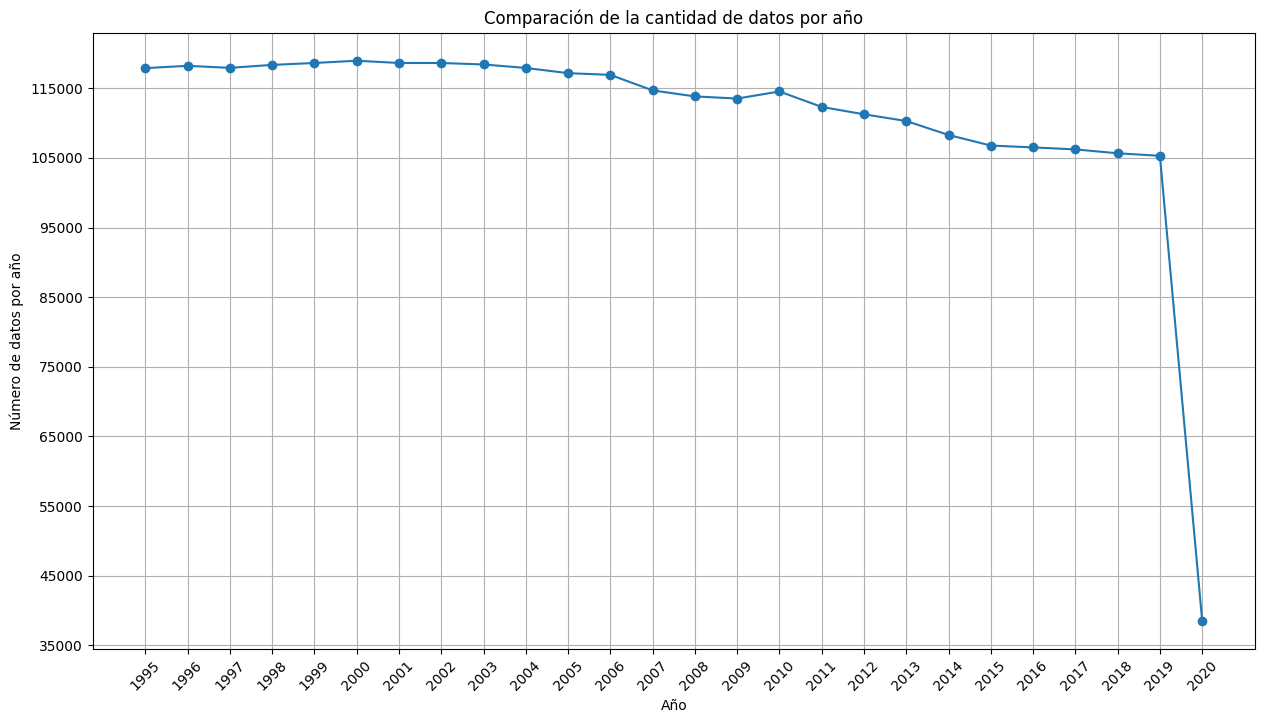

In [126]:
# Crear un gráfico de líneas 
plt.figure(figsize=(15, 8))
plt.plot(years, count, marker='o')
plt.title('Comparación de la cantidad de datos por año')
plt.xlabel('Año')
plt.ylabel('Número de datos por año')
plt.xticks(np.arange(1995, 2021, 1), rotation=45)
plt.yticks(np.arange(35000, 120000, 10000))
plt.grid(True)
plt.show()

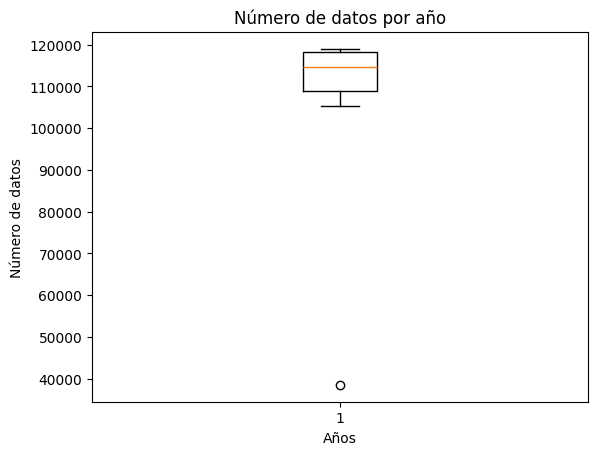

In [127]:
# Crear un boxplot
plt.boxplot(count)
plt.xlabel('Años')
plt.ylabel('Número de datos')
plt.title('Número de datos por año')

# Mostrar el gráfico
plt.show()

In [128]:
# Calcular la Correlación
correlacion = np.corrcoef(count, avg_temperatures)[0, 1]
print(f'Correlación: {correlacion:.2f}')

Correlación: -0.14


El análisis de la correlación entre la cantidad de mediciones y la temperatura media anual reveló una ligera correlación negativa, lo que sugiere que, en general, a mayor cantidad de datos disponibles, la temperatura media tiende a ser ligeramente más baja. Este hallazgo indica que en años con un mayor número de registros, las temperaturas promedio han sido menores, posiblemente debido a una mayor representatividad de diferentes condiciones climáticas.

Sin embargo, los datos correspondientes al año 2020 rompen con esta tendencia. La temperatura media de ese año muestra un descenso abrupto que no se alinea con la correlación observada en los demás años. Esto sugiere que factores adicionales o particulares de 2020 podrían haber influido en este resultado anómalo. La caída en la temperatura media podría estar relacionada con una menor calidad de los datos o con eventos climáticos excepcionales que no se habían registrado previamente.

#### Modelado

Modelo para predecir temperaturas futuras usando técnicas de machine learning.

Utilizaré la regresión lineal en este análisis porque es una técnica que se ajusta bien a la relación entre la temperatura y los años. La regresión lineal es especialmente adecuada cuando se busca modelar y entender cómo una variable dependiente, en este caso, la temperatura media, varía en función de una variable independiente, como los años transcurridos.

In [129]:
# Preparar los datos
years_arrays = years.reshape(-1, 1)

In [130]:
# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(years_arrays, avg_temperatures)

LinearRegression()

In [131]:
# Predecir la temperatura en determinados años
year_prediction = np.array([[2021], [2022], [2023], [2024]])
temp_prediction = model.predict(year_prediction)
print(temp_prediction)

[61.41396098 61.80765862 62.20135627 62.59505391]


In [132]:
year_lineal = np.linspace(1995, 2025, 1000).reshape(-1, 1)
temp_lineal = model.predict(year_lineal)

In [133]:
# Coeficiente de Determinación r cuadrado
r2 = model.score(years_arrays, avg_temperatures)
print(f'R^2: {r2:.2f}')

R^2: 0.72


In [134]:
# Error Cuadrático Medio (MSE)
temp_pred_train = model.predict(years_arrays)
mse = mean_squared_error(avg_temperatures, temp_pred_train)
print(f'MSE: {mse:.2f}')

MSE: 3.44


In [135]:
# Error Absoluto Medio (MAE)
mae = mean_absolute_error(avg_temperatures, temp_pred_train)
print(f'MAE: {mae:.2f}')

MAE: 1.30


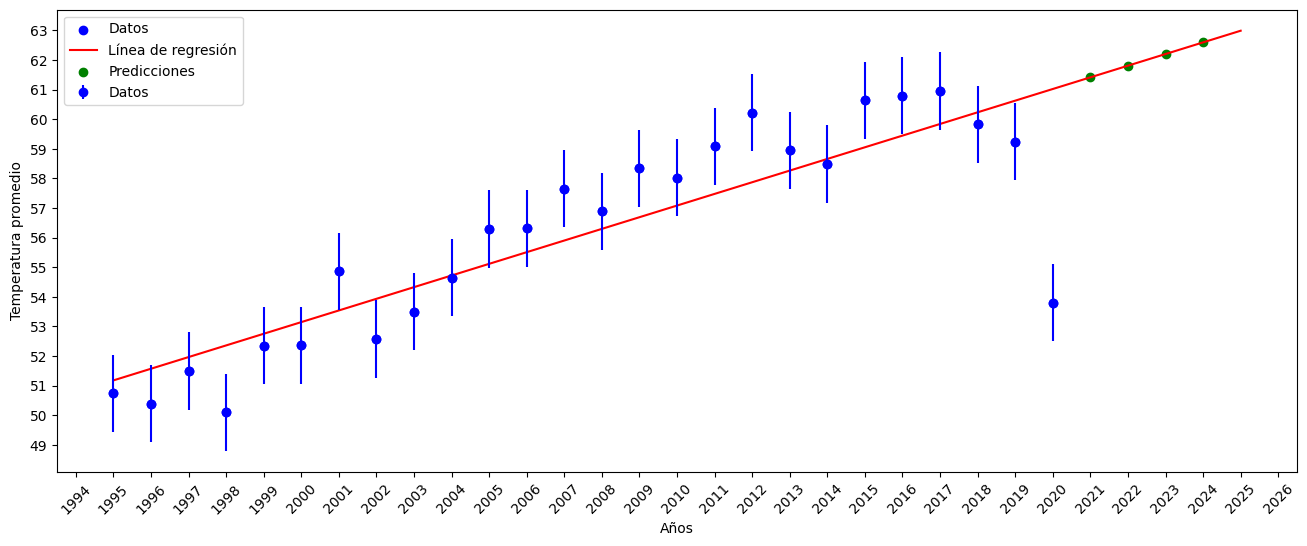

In [136]:
# Graficar
plt.figure(figsize=(16, 6))
plt.scatter(years_arrays, avg_temperatures, color='blue', label='Datos')
plt.plot(year_lineal, temp_lineal, color='red', label='Línea de regresión')
plt.scatter(year_prediction, temp_prediction, color='green', label='Predicciones')
plt.errorbar(years_arrays, avg_temperatures, yerr=mae, fmt='o', color='blue', label='Datos')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))  
ax.yaxis.set_major_locator(MultipleLocator(1))
plt.xticks(rotation=45)
plt.xlabel('Años')
plt.ylabel('Temperatura promedio')
plt.legend()
plt.show()

Después de realizar una regresión lineal sobre los datos, se observa una clara tendencia al alza, lo que indica que las temperaturas medias han ido subiendo con el tiempo. Sin embargo, los datos correspondientes al año 2020 son notablemente anómalos, estando muy fuera del rango normal en comparación con otros años. Esto sugiere la presencia de factores atípicos como ya vimos antes.

Además, el coeficiente de determinación 𝑅2 obtenido no es muy cercano a 1, lo que indica que el modelo no explica completamente la variabilidad en los datos. Esto refleja que, aunque existe una tendencia general de aumento, hay variaciones significativas en las temperaturas que el modelo lineal no captura. Asimismo, el error absoluto medio es considerable, lo que refuerza la idea de que, aunque la tendencia general es clara, el modelo no logra predecir con precisión todos los puntos de datos, especialmente aquellos que se desvían significativamente de la tendencia general.

Dado que los datos del año 2020 muestran una desviación significativa en comparación con los demás años y afectan negativamente la precisión del modelo, he decidido eliminarlos del análisis, ya que como vimos antes, sus anomalías se deben a la cantidad de datos y no cuestiones externas. Al excluir estos datos atípicos, espero que el modelo de regresión lineal se ajuste mejor a la tendencia general, proporcionando un 𝑅2 más alto y un error absoluto medio más bajo, lo que indicaría un mejor ajuste y una mayor capacidad del modelo para explicar la variabilidad en los datos de temperatura a lo largo del tiempo.

In [137]:
# Quitamos los datos del año 2020
sin_2020 = years[:-1]
temp_sin_2020 = avg_temperatures[:-1]

In [138]:
years_arrays_sin_2020 = sin_2020.reshape(-1, 1)

# Coeficiente de Determinación r cuadrado
r2_2 = model.score(years_arrays_sin_2020, temp_sin_2020)
print(f'R^2: {r2_2:.2f}')
# Error Cuadrático Medio (MSE)
temp_pred_train = model.predict(years_arrays_sin_2020)
mse_2 = mean_squared_error(temp_sin_2020, temp_pred_train)
print(f'MSE: {mse_2:.2f}')
# Error Absoluto Medio (MAE)
mae_2 = mean_absolute_error(temp_sin_2020, temp_pred_train)
print(f'MAE: {mae_2:.2f}')

R^2: 0.88
MSE: 1.49
MAE: 1.07


[62.71223347 63.17805736 63.64388125 64.10970514]


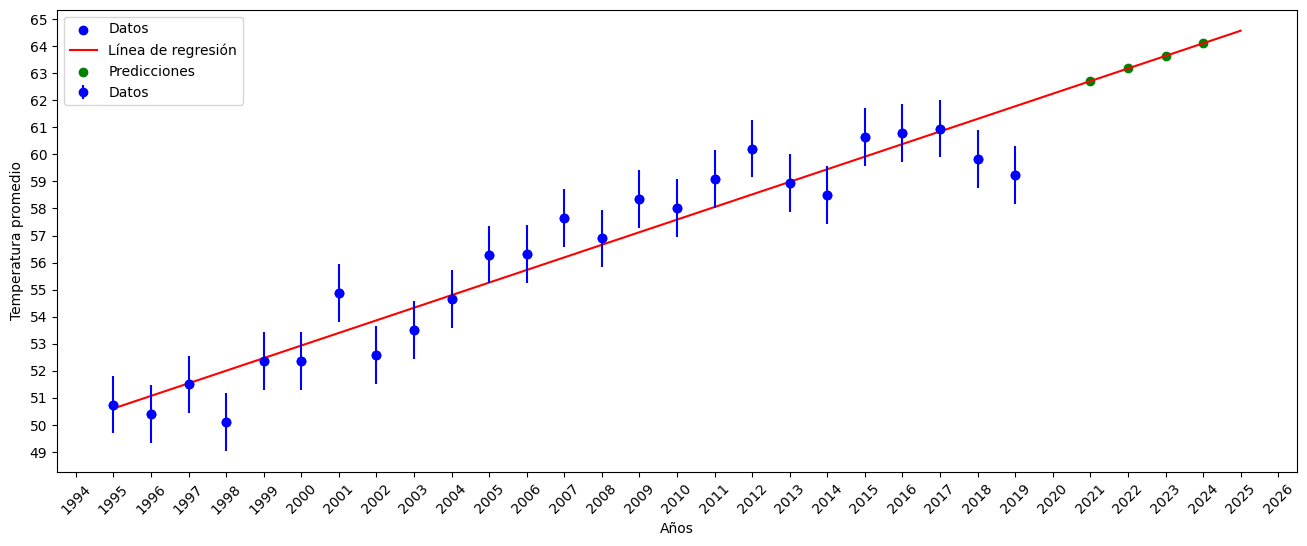

In [139]:
# Preparar los datos
years_arrays_sin_2020 = sin_2020.reshape(-1, 1)
# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(years_arrays_sin_2020, temp_sin_2020)
# Predecir la temperatura en determinados años
year_prediction = np.array([[2021], [2022], [2023], [2024]])
temp_prediction = model.predict(year_prediction)
print(temp_prediction)
year_lineal = np.linspace(1995, 2025, 1000).reshape(-1, 1)
temp_lineal = model.predict(year_lineal)
# Graficar
plt.figure(figsize=(16, 6))
plt.scatter(years_arrays_sin_2020, temp_sin_2020, color='blue', label='Datos')
plt.plot(year_lineal, temp_lineal, color='red', label='Línea de regresión')
plt.scatter(year_prediction, temp_prediction, color='green', label='Predicciones')
plt.errorbar(years_arrays_sin_2020, temp_sin_2020, yerr=mae_2, fmt='o', color='blue', label='Datos')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))  
ax.yaxis.set_major_locator(MultipleLocator(1))
plt.xlabel('Años')
plt.xticks(rotation=45)
plt.ylabel('Temperatura promedio')
plt.legend()
plt.show()


Al eliminar los datos del año 2020 del análisis, el modelo de regresión lineal mostró una mejora significativa en su ajuste. Con los datos de 2020 excluidos, el coeficiente de determinación 𝑅2 se acercó más a 1, indicando que el modelo ahora explica una mayor proporción de la variabilidad en las temperaturas a lo largo del tiempo. Además, tanto el error cuadrático medio (MSE) como el error absoluto medio (MAE) disminuyeron, lo que sugiere una mayor precisión en las predicciones del modelo. Esta mejora en las métricas de ajuste confirma que la exclusión de los datos atípicos de 2020 ha permitido al modelo representar de manera más fiel la tendencia general de aumento en las temperaturas.

Al eliminar o corregir los datos que se desvían significativamente del rango esperado, se puede mejorar la calidad del ajuste del modelo de regresión lineal. Los datos atípicos o erróneos pueden distorsionar la capacidad del modelo para capturar las tendencias y patrones subyacentes, afectando negativamente las métricas de ajuste como el coeficiente de determinación 𝑅2, el error cuadrático medio (MSE) y el error absoluto medio (MAE). Al depurar estos datos y centrarse en un conjunto de datos más homogéneo y representativo, el modelo puede ajustarse mejor a la relación real entre las variables y ofrecer predicciones más precisas, reflejando de manera más efectiva las verdaderas tendencias y variaciones en los datos.

#### Análisis Geoespacial

In [140]:
# Temperaturas del año 1997
temp1997 = df_t['Year'] == 1997
temp_1997 = df_t[temp1997].groupby('Country')
avg_1997 = temp_1997['AvgTemperature'].mean()
avg_1997

Country
Albania      -88.228767
Algeria       64.926301
Argentina     63.143836
Australia     62.151781
Austria       49.682740
                ...    
Uzbekistan    51.572329
Venezuela     80.173973
Vietnam       75.918082
Yugoslavia    52.224384
Zambia        12.608219
Name: AvgTemperature, Length: 125, dtype: float64

In [141]:
# Convertir esta tabla en arrays
paises = np.array(avg_1997.index)
temperaturas = np.array(avg_1997.values)

In [142]:
datos = {
    'pais': paises,
    'temperatura': temperaturas
}

# Crear un DataFrame
df = pd.DataFrame(datos)

# Crear el gráfico de mapa de coropletas
fig = px.choropleth(
    df,
    locations='pais',
    locationmode='country names',
    color='temperatura',
    color_continuous_scale='Viridis',
    title='Temperaturas Promedio por País'
)

# Guardar el gráfico en un archivo HTML
fig.write_html('mapa_temperaturas.html')

# Abrir el archivo HTML en el navegador predeterminado
import webbrowser
webbrowser.open('mapa_temperaturas.html')

True

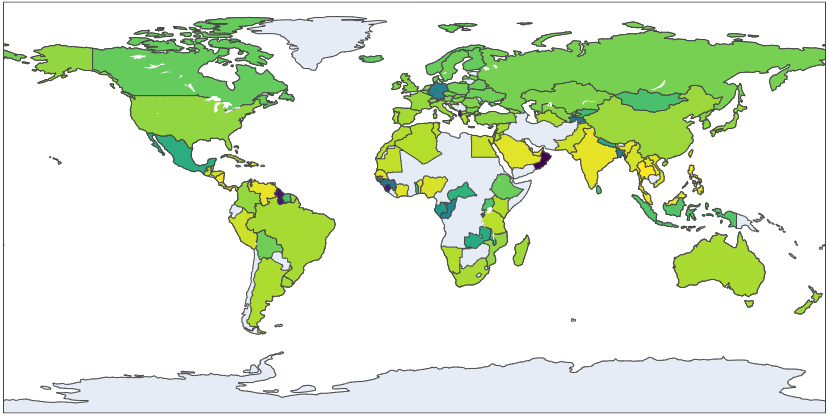

In [143]:
# Ruta a la imagen
image_path = 'C:/Users/franc/Pictures/Proyectos/Captura de pantalla 2024-08-13 145410.png'
# Mostrar la imagen
display(Image(filename=image_path))

In [144]:
# Temperaturas del año 2019
temp2019 = df_t['Year'] == 2019
temp_2019 = df_t[temp2019].groupby('Country')
avg_2019 = temp_2019['AvgTemperature'].mean()
avg_2019

Country
Albania       59.467123
Algeria       62.296986
Argentina     60.407123
Australia     61.287616
Austria       51.817534
                ...    
Uruguay       59.540548
Uzbekistan    59.355068
Venezuela     70.998356
Vietnam       74.333425
Yugoslavia    54.411233
Name: AvgTemperature, Length: 109, dtype: float64

In [145]:
# Convertir esta tabla en arrays
paises = np.array(avg_2019.index)
temperaturas = np.array(avg_2019.values)

datos = {
    'pais': paises,
    'temperatura': temperaturas
}

# Crear un DataFrame
df = pd.DataFrame(datos)

# Crear el gráfico de mapa de coropletas
fig = px.choropleth(
    df,
    locations='pais',
    locationmode='country names',
    color='temperatura',
    color_continuous_scale='Viridis',
    title='Temperaturas Promedio por País'
)

# Guardar el gráfico en un archivo HTML
fig.write_html('mapa_temperaturas.html')

# Abrir el archivo HTML en el navegador predeterminado
import webbrowser
webbrowser.open('mapa_temperaturas.html')

True

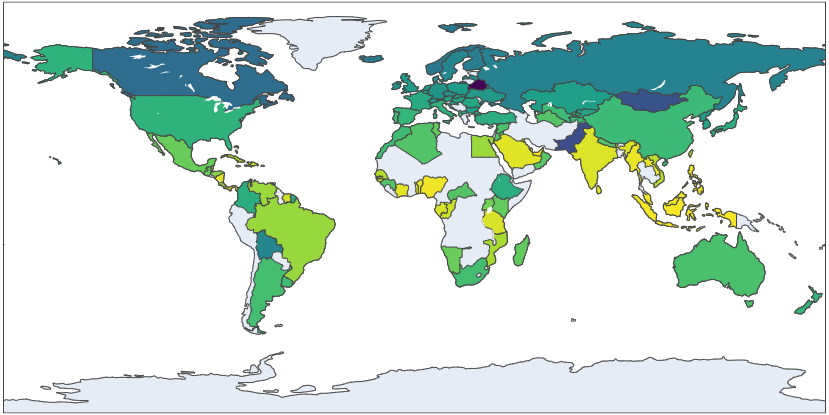

In [146]:
# Ruta a la imagen
image_path = 'C:/Users/franc/Pictures/Proyectos/Captura de pantalla 2024-08-13 150602.png'
# Mostrar la imagen
display(Image(filename=image_path))